<a href="https://colab.research.google.com/github/agushery/DataVisualization-COVID19/blob/master/Data_Visualization_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

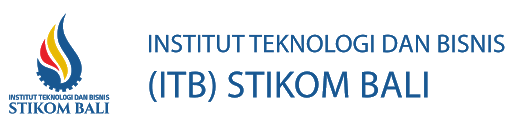

# **Data Visualization Covid-19**
* **Nama : Agus Hery Setiawan**
* **Data Source-COVID-19 : https://github.com/CSSEGISandData**
* **Data Source Population : https://www.worldpopulationreview.com**

## **Prepare library and Load Dataset**

### **Import Library**

In [1]:
# for load dataset
import pandas as pd

# for processing quartil
import numpy as np

# for prepocessing data (StandardScaler)
from sklearn import preprocessing

# for K-Means
from sklearn.cluster import KMeans

# for visual
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8
import cufflinks as cf
cf.go_offline()

import seaborn as sns
sns.set_style('whitegrid')

print('Setup Complete')


Setup Complete


### **Load Dataset Covid from source**

In [2]:
# save url to variabel
url_confirm = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovery = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# load dataset with pandas
confirm_data = pd.read_csv(url_confirm)
death_data = pd.read_csv(url_death)
recovery_data = pd.read_csv(url_recovery)

print('Load Dataset Complete')

Load Dataset Complete


### **Load Dataset Population**

In [3]:
population_data = pd.read_csv('Data/population.csv')
print('Load Dataset Complete')

Load Dataset Complete


### **Check Shape and Info of Dataset**

SHAPE

In [4]:
print('confirm_data : ', confirm_data.shape)
print('death_data : ', death_data.shape)
print('recovery_data : ', recovery_data.shape)
print('Population_data : ', population_data.shape)

confirm_data :  (276, 498)
death_data :  (276, 498)
recovery_data :  (261, 498)
Population_data :  (232, 18)


INFO

In [5]:
print('confirm_data : ', confirm_data.info())
print('death_data : ', death_data.info())
print('recovery_data : ', recovery_data.info())
print('population_data : ', population_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
confirm_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
death_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1015.6+ KB
recovery_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cca2             231 non-null    object 
 1   name             232 non-null    object 
 2   pop2021          232 non-null    int64  
 3   pop2020          232 non-null    int64  
 4

## **Preprocessing Data**

### **Melt Data**

In [6]:
# Confirmed
confirm_data = confirm_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Confirmed'
)

# Death
death_data = death_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Deaths'
)

# Recovery
recovery_data = recovery_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Recovered'
)

### **Merge Dataset COVID-19**

**Grouped Data  with same Country/Region and Time**

In [7]:
# Confirmed Data
confirm_data = confirm_data.groupby(['Country/Region', 'Time'])['Confirmed'].sum()
confirm_data = confirm_data.to_frame().reset_index()

# Deaths Data
death_data = death_data.groupby(['Country/Region', 'Time'])['Deaths'].sum()
death_data = death_data.to_frame().reset_index()

# Recovery Data
recovery_data = recovery_data.groupby(['Country/Region', 'Time'])['Recovered'].sum()
recovery_data = recovery_data.to_frame().reset_index()

**Rename Columns and Pick Columns Coutry/Region, Population of Population dataset**

In [8]:
population_data.rename(columns={'name' : 'Country/Region', 'pop2020' : 'Population'}, inplace = True)
population_data = population_data[['Country/Region','Population']]

**MERGE DATASET COVID-19**

In [9]:
data = confirm_data.merge(death_data, how='inner')
data = data.merge(recovery_data, how='inner')

**Add Active Column**

In [10]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1/1/21,51526,2191,41727,7608
1,Afghanistan,1/10/21,53489,2277,43948,7264
2,Afghanistan,1/11/21,53538,2288,44137,7113
3,Afghanistan,1/12/21,53584,2301,44608,6675
4,Afghanistan,1/13/21,53584,2301,44850,6433


**Grouped Time Column**

In [11]:
# sort data with groupped time
data['Time'] = pd.to_datetime(data['Time'])
dataGroup = data.groupby('Time')[["Confirmed","Deaths","Recovered","Active"]].sum()

**Initiation last day of data**

In [12]:

recent_date = data['Time'].max()
last_day = data[data['Time'] == recent_date]

**MERGE DATA Last Day With Population**

In [13]:
final_data = pd.merge(last_day, population_data)
final_data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,2021-05-29,70111,2899,57281,9931,38928346
1,Albania,2021-05-29,132297,2449,129215,633,2877797
2,Algeria,2021-05-29,128456,3460,89419,35577,43851044
3,Andorra,2021-05-29,13693,127,13416,150,77265
4,Angola,2021-05-29,34180,757,27646,5777,32866272


**Comparison of the number of deaths and active cases to the population of each country**

In [14]:
final_data['%Confirmed'] = final_data['Confirmed'].div(final_data['Population'])
final_data['%Deaths'] = final_data['Deaths'].div(final_data['Population'])
final_data['%Active'] = final_data['Active'].div(final_data['Population'])
final_data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
0,Afghanistan,2021-05-29,70111,2899,57281,9931,38928346,0.001801,0.000074,0.000255
1,Albania,2021-05-29,132297,2449,129215,633,2877797,0.045972,0.000851,0.000220
2,Algeria,2021-05-29,128456,3460,89419,35577,43851044,0.002929,0.000079,0.000811
3,Andorra,2021-05-29,13693,127,13416,150,77265,0.177221,0.001644,0.001941
4,Angola,2021-05-29,34180,757,27646,5777,32866272,0.001040,0.000023,0.000176


**Create Quartil**

In [15]:
q1_confirmed = np.percentile(final_data['%Confirmed'],25)
q2_confirmed = np.percentile(final_data['%Confirmed'],50)
q1_deaths = np.percentile(final_data['%Deaths'],25)
q2_deaths = np.percentile(final_data['%Deaths'],50)
q1_active = np.percentile(final_data['%Active'],25)
q2_active = np.percentile(final_data['%Active'],50)

### **Category Country by Quartil**

In [16]:
cukupRawan = final_data[(final_data['%Deaths'] <= q1_deaths) | (final_data['%Active'] <= q1_active)]
rawan = final_data[(((final_data['%Deaths'] > q1_deaths) & (final_data['%Deaths'] <= q2_deaths)) | ((final_data['Active'] > q1_active) & (final_data['%Active'] <= q2_active)))]
sangatRawan = final_data[(final_data['%Deaths'] > q2_deaths) | (final_data['%Active'] > q2_active)]

## **VISUALIZATION DATA**

### **Trend Confirmed, Deaths, Recovered, and Active Case**

In [17]:
dataGroup.iplot(title = "Trend Kasus COVID-19 Secara Global", xTitle = "Time", yTitle = "Amount")

### **Categories Country**

**Quite Vulnerable**

In [18]:
# Cukup Rawan
fig = px.choropleth(cukupRawan, locations=cukupRawan['Country/Region'],
                    color=cukupRawan['Confirmed'],locationmode='country names', 
                    hover_name=cukupRawan['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="The country is quite vulnerable")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()

In [19]:
cukupRawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
4,Angola,2021-05-29 00:00:00,34180,757,27646,5777,32866272,0.001040,0.000023,0.000176
5,Antigua and Barbuda,2021-05-29 00:00:00,1259,42,1206,11,97929,0.012856,0.000429,0.000112
19,Bhutan,2021-05-29 00:00:00,1603,1,1241,361,771608,0.002077,0.000001,0.000468
24,Brunei,2021-05-29 00:00:00,241,3,228,10,437479,0.000551,0.000007,0.000023
26,Burkina Faso,2021-05-29 00:00:00,13430,166,13248,16,20903273,0.000642,0.000008,0.000001
28,Burundi,2021-05-29 00:00:00,4715,6,773,3936,11890784,0.000397,0.000001,0.000331
29,Cambodia,2021-05-29 00:00:00,28825,203,21315,7307,16718965,0.001724,0.000012,0.000437
32,Central African Republic,2021-05-29 00:00:00,7085,98,6665,322,4829767,0.001467,0.000020,0.000067
33,Chad,2021-05-29 00:00:00,4928,173,4742,13,16425864,0.000300,0.000011,0.000001
35,China,2021-05-29 00:00:00,102960,4846,97737,377,1439323776,0.000072,0.000003,0.000000


**Vulnerable Country**

In [20]:
# Rawan
fig = px.choropleth(last_day, locations=rawan['Country/Region'],
                    color=rawan['Confirmed'],locationmode='country names', 
                    hover_name=rawan['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Vulnerable Country")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()

In [21]:
rawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
0,Afghanistan,2021-05-29 00:00:00,70111,2899,57281,9931,38928346,0.001801,0.000074,0.000255
1,Albania,2021-05-29 00:00:00,132297,2449,129215,633,2877797,0.045972,0.000851,0.000220
2,Algeria,2021-05-29 00:00:00,128456,3460,89419,35577,43851044,0.002929,0.000079,0.000811
4,Angola,2021-05-29 00:00:00,34180,757,27646,5777,32866272,0.001040,0.000023,0.000176
5,Antigua and Barbuda,2021-05-29 00:00:00,1259,42,1206,11,97929,0.012856,0.000429,0.000112
8,Australia,2021-05-29 00:00:00,30096,910,23579,5607,25499884,0.001180,0.000036,0.000220
9,Austria,2021-05-29 00:00:00,644207,10592,627672,5943,9006398,0.071528,0.001176,0.000660
10,Azerbaijan,2021-05-29 00:00:00,333723,4903,323617,5203,10139177,0.032914,0.000484,0.000513
13,Bangladesh,2021-05-29 00:00:00,797386,12549,737408,47429,164689383,0.004842,0.000076,0.000288
14,Barbados,2021-05-29 00:00:00,4012,47,3922,43,287375,0.013961,0.000164,0.000150


**Very Vulnerable Country**

In [22]:
# Sangat Rawan
fig = px.choropleth(last_day, locations=sangatRawan['Country/Region'],
                    color=sangatRawan['Confirmed'],locationmode='country names', 
                    hover_name=sangatRawan['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Very Vulnerable Country")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()

In [23]:
sangatRawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
1,Albania,2021-05-29 00:00:00,132297,2449,129215,633,2877797,0.045972,0.000851,0.000220
2,Algeria,2021-05-29 00:00:00,128456,3460,89419,35577,43851044,0.002929,0.000079,0.000811
3,Andorra,2021-05-29 00:00:00,13693,127,13416,150,77265,0.177221,0.001644,0.001941
5,Antigua and Barbuda,2021-05-29 00:00:00,1259,42,1206,11,97929,0.012856,0.000429,0.000112
6,Argentina,2021-05-29 00:00:00,3732263,77108,3288467,366688,45195774,0.082580,0.001706,0.008113
7,Armenia,2021-05-29 00:00:00,222555,4428,212752,5375,2963243,0.075105,0.001494,0.001814
9,Austria,2021-05-29 00:00:00,644207,10592,627672,5943,9006398,0.071528,0.001176,0.000660
10,Azerbaijan,2021-05-29 00:00:00,333723,4903,323617,5203,10139177,0.032914,0.000484,0.000513
11,Bahamas,2021-05-29 00:00:00,11745,229,10642,874,393244,0.029867,0.000582,0.002223
12,Bahrain,2021-05-29 00:00:00,235698,939,205962,28797,1701575,0.138518,0.000552,0.016924


### **Last Update Data Visual covid 19 Global**

In [24]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Confirmed'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Last Update Data Visual covid 19 Global")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()